In [67]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
!pip install --upgrade xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
df = pd.read_csv("/content/Test_Data.csv")

In [69]:
df.head()

,Activity,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,Tau,514.112825,280.127163,2043.219975,983.894190,62.264430,407.920959,873.090147,341.502421,...,51.039549,90.502279,794.425537,135.632398,605.175961,399.664283,309.623417,1438.193673,448.423683,1146.551728
1,1,Ofu,502.011480,367.139952,1578.241845,952.498432,153.040439,387.172971,868.124526,361.961562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,Tau,553.445613,246.669667,1527.881591,1039.902223,32.232777,402.542573,801.059405,345.487249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,Olosega,493.511261,304.343252,1671.436908,836.613718,132.190120,368.481594,861.582675,343.469353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,Aunuu,482.213205,428.869497,1538.468529,943.415119,160.019777,369.085979,849.722321,343.343067,...,50.119562,133.679537,813.712626,88.676850,395.318535,333.471865,395.757204,1421.798388,440.439527,1344.631717


In [70]:
df.duplicated().sum()

0

In [71]:
round(df.isnull().sum()/df.shape[0],2)

Activity    0.0
Country     0.0
X1          0.0
X2          0.0
X3          0.0
X4          0.0
X5          0.0
X6          0.0
X7          0.0
X8          0.0
X9          0.0
X10         0.0
X11         0.0
X12         0.0
X13         0.0
X14         0.0
X15         0.0
X16         0.0
X17         0.0
X18         0.0
X19         0.0
X20         0.0
X21         0.0
X22         0.0
X23         0.0
X24         0.0
X25         0.0
X26         0.0
X27         0.0
X28         0.0
X29         0.0
X30         0.0
dtype: float64

In [72]:
df['Country'].value_counts()

Tau        1500
Ofu        1271
Olosega    1238
Aunuu       991
Name: Country, dtype: int64

In [73]:
Country_1 = {'Tau' : 1.0, 'Ofu': 2.0, 'Olosega' : 3.0, "Aunuu": 4.0}
df['Country'] = df['Country'].map(Country_1)

In [74]:
df.head()

,Activity,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,1.0,514.112825,280.127163,2043.219975,983.894190,62.264430,407.920959,873.090147,341.502421,...,51.039549,90.502279,794.425537,135.632398,605.175961,399.664283,309.623417,1438.193673,448.423683,1146.551728
1,1,2.0,502.011480,367.139952,1578.241845,952.498432,153.040439,387.172971,868.124526,361.961562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1.0,553.445613,246.669667,1527.881591,1039.902223,32.232777,402.542573,801.059405,345.487249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,3.0,493.511261,304.343252,1671.436908,836.613718,132.190120,368.481594,861.582675,343.469353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,4.0,482.213205,428.869497,1538.468529,943.415119,160.019777,369.085979,849.722321,343.343067,...,50.119562,133.679537,813.712626,88.676850,395.318535,333.471865,395.757204,1421.798388,440.439527,1344.631717


In [75]:
df = df[np.isfinite(df).all(1)]

In [76]:
df

,Activity,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,1.0,514.112825,280.127163,2043.219975,983.894190,62.264430,407.920959,873.090147,341.502421,...,51.039549,90.502279,794.425537,135.632398,605.175961,399.664283,309.623417,1438.193673,448.423683,1146.551728
1,1,2.0,502.011480,367.139952,1578.241845,952.498432,153.040439,387.172971,868.124526,361.961562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,1.0,553.445613,246.669667,1527.881591,1039.902223,32.232777,402.542573,801.059405,345.487249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,3.0,493.511261,304.343252,1671.436908,836.613718,132.190120,368.481594,861.582675,343.469353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,4.0,482.213205,428.869497,1538.468529,943.415119,160.019777,369.085979,849.722321,343.343067,...,50.119562,133.679537,813.712626,88.676850,395.318535,333.471865,395.757204,1421.798388,440.439527,1344.631717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3.0,477.903767,267.275414,1531.616103,1027.967177,127.378339,363.823272,856.536041,336.276056,...,51.715774,16.721330,825.541984,58.612293,467.828817,306.428589,322.175846,1475.619566,385.415927,1145.115537
4996,0,1.0,488.848448,249.257511,1674.987347,928.696906,161.415992,370.681772,866.567323,341.957247,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4997,1,3.0,480.803161,257.754345,1556.059212,841.777564,184.081233,418.356418,845.644802,324.075123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4998,1,3.0,458.078947,309.133672,1866.103446,875.883615,150.059629,398.529310,832.777748,351.161747,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
from sklearn.linear_model import LinearRegression
sffs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'neg_mean_squared_error',
           cv = 0)


X = df.iloc[:, 1:]
y = df.iloc[:, :1]

sffs.fit(X, y)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), floating=True,
                          k_features=(5, 5), scoring='neg_mean_squared_error')

In [78]:
df['Country'].unique()

array([1., 2., 3., 4.])

In [79]:
from sklearn.ensemble import RandomForestClassifier
target = df[['Activity']]
feature = df.drop(columns = ['Country','Activity'])

rf = RandomForestClassifier()

In [80]:
target['Activity'].unique()

array([1, 0])

<ipython-input-81-e81f6cac3089>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(feature,target)


[]

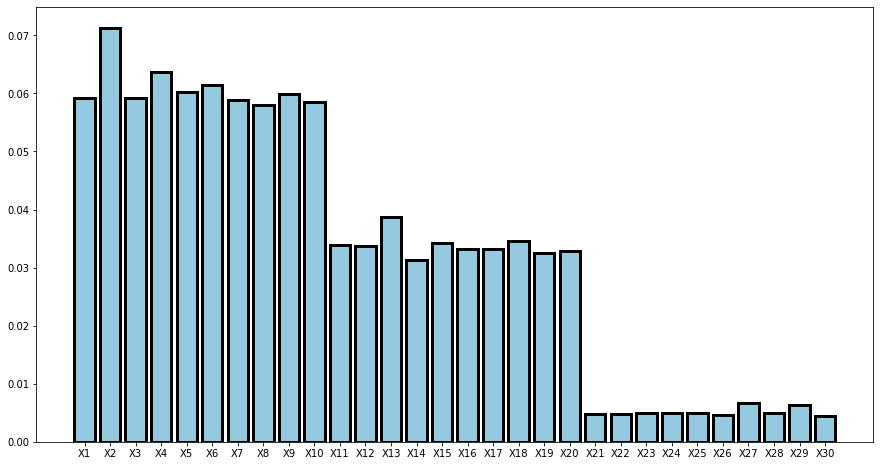

In [81]:
rf.fit(feature,target)
plt.figure(figsize=(15, 8))
g = sns.barplot(y=rf.feature_importances_,x=feature.columns,edgecolor="black",linewidth=3,color="#87ceed")
plt.plot()

In [83]:
X = df.drop(columns = ['Activity','X20','X21','X22', 'X23','X24','X25','X26','X27','X28','X29'])
Y = df[['Activity']]

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

In [85]:
import xgboost as xgb
xgb_ = xgb.XGBClassifier(learning_rate=0.1, n_estimators=400, max_depth= 5, min_child_weight= 1, gamma = 0, subsample= 0.8, colsample_bytree= 0.8, objective = "binary:logistic", nthread = 4, seed = 27)


In [86]:
xgb_.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, nthread=4, num_parallel_tree=None,
              predictor=None, ...)

In [87]:
pre_xgb = xgb_.predict(X_test)
xgb_prob = xgb_.predict_proba(X_test)[:,1]

In [88]:
from sklearn.metrics import classification_report

In [89]:
print(classification_report(Y_test,pre_xgb))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       514
           1       0.70      0.74      0.72       485

    accuracy                           0.72       999
   macro avg       0.72      0.72      0.72       999
weighted avg       0.72      0.72      0.72       999



In [90]:
rf_1 = RandomForestClassifier()
rf_1.fit(X_train, Y_train)
rf_1_pre = rf_1.predict(X_test)
rf_1_prob = rf_1.predict_proba(X_test)[:, 1]

<ipython-input-90-ae1c2d0da0e4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_1.fit(X_train, Y_train)


In [91]:
print(classification_report(Y_test, rf_1_pre))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       514
           1       0.72      0.75      0.73       485

    accuracy                           0.73       999
   macro avg       0.74      0.74      0.73       999
weighted avg       0.74      0.73      0.73       999



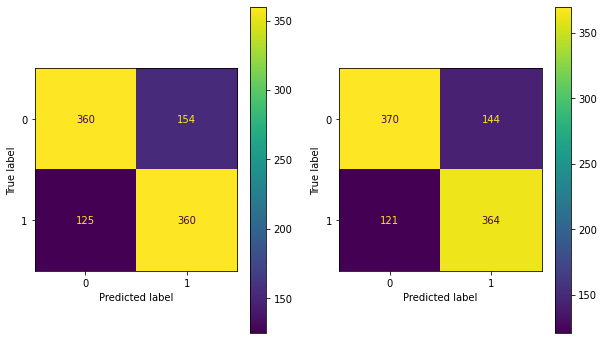

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
fig,ax = plt.subplots(1,2,figsize=(10,6))
cmxg = confusion_matrix(Y_test, pre_xgb)
disp = ConfusionMatrixDisplay(cmxg)
disp.plot(ax= ax[0])


cmrf = confusion_matrix(Y_test, rf_1_pre)
disp = ConfusionMatrixDisplay(cmrf)
disp.plot(ax= ax[1])

In [93]:
from sklearn.metrics import roc_auc_score
print("xgboost roc auc score:",roc_auc_score(Y_test,xgb_prob))
print("RF roc auc score:",roc_auc_score(Y_test,rf_1_prob))

xgboost roc auc score: 0.7700348991134823
RF roc auc score: 0.7831421236311124
